In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
train_copy = train.copy()

In [6]:
train.drop('ID', axis=1,inplace=True)

<AxesSubplot:xlabel='Manufacturer'>

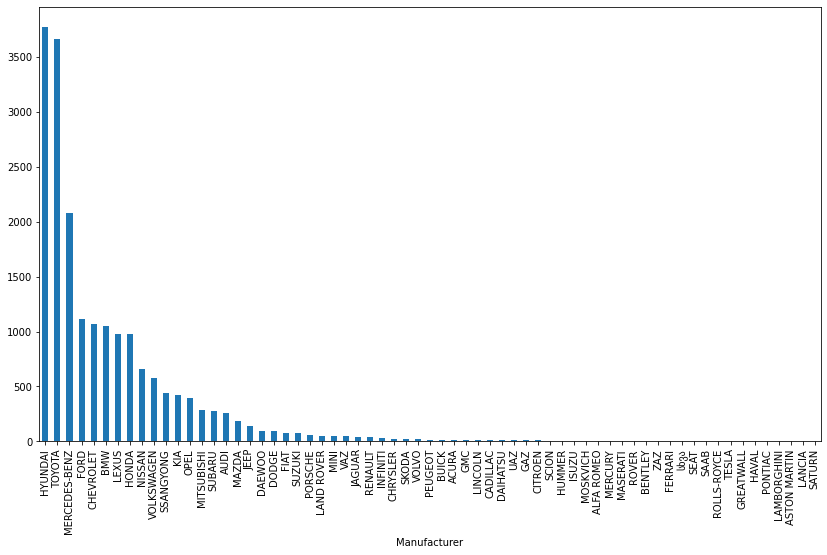

In [7]:
plt.figure(figsize=(14,8))
train.groupby('Manufacturer').count()['Price'].sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:xlabel='Prod. year'>

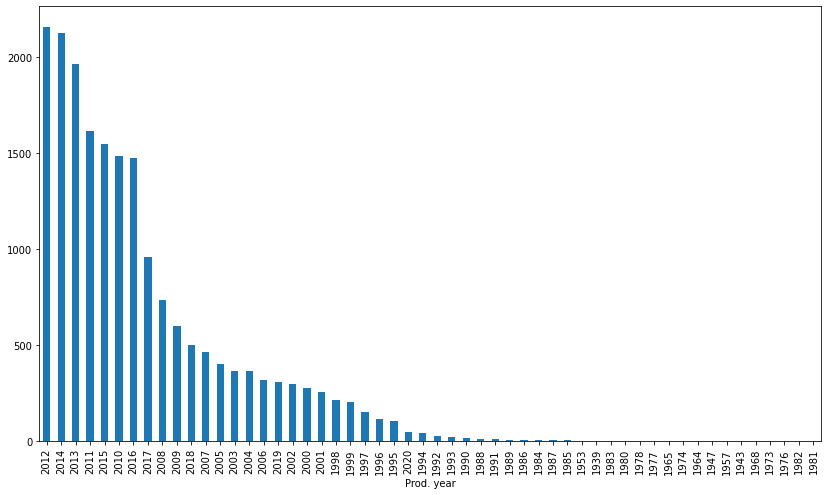

In [8]:
plt.figure(figsize=(14,8))
train.groupby('Prod. year').count()['Price'].sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:xlabel='Category'>

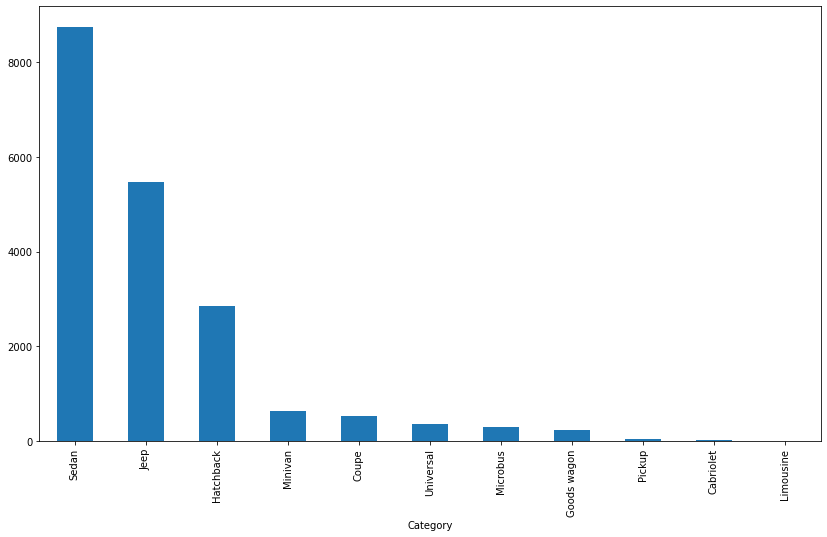

In [9]:
plt.figure(figsize=(14,8))
train.groupby('Category').count()['Price'].sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:xlabel='Manufacturer'>

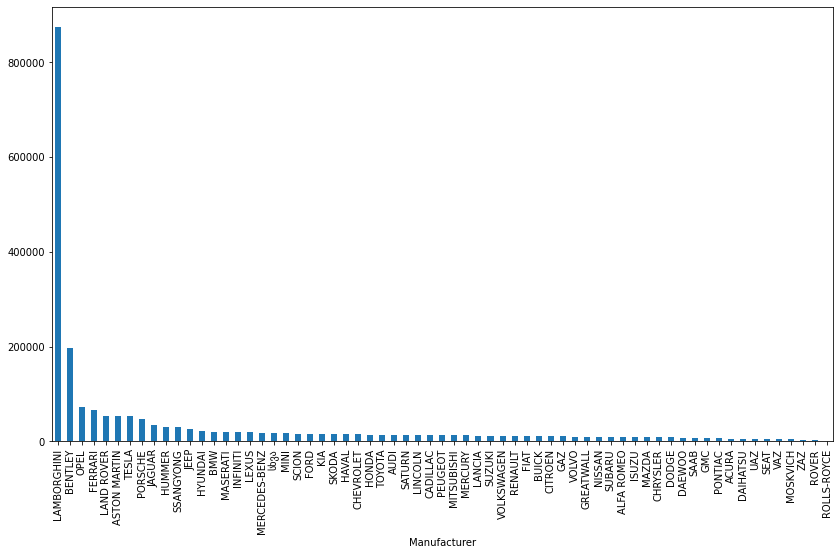

In [10]:
plt.figure(figsize=(14,8))
train.groupby('Manufacturer').mean()['Price'].sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:xlabel='Category'>

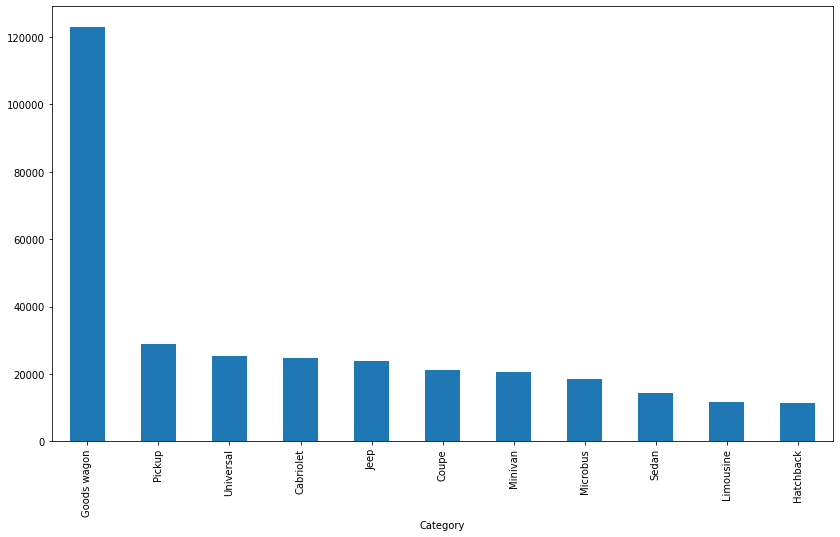

In [11]:
plt.figure(figsize=(14,8))
train.groupby('Category').mean()['Price'].sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:xlabel='Prod. year'>

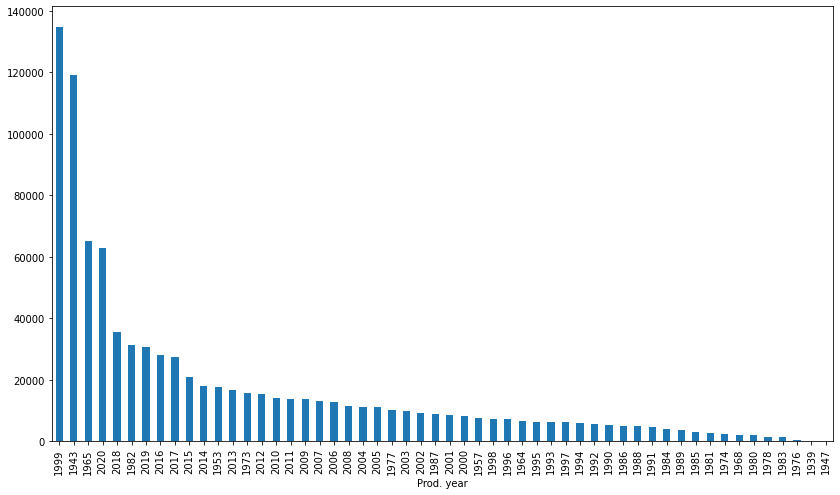

In [12]:
plt.figure(figsize=(14,8))
train.groupby('Prod. year').mean()['Price'].sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:>

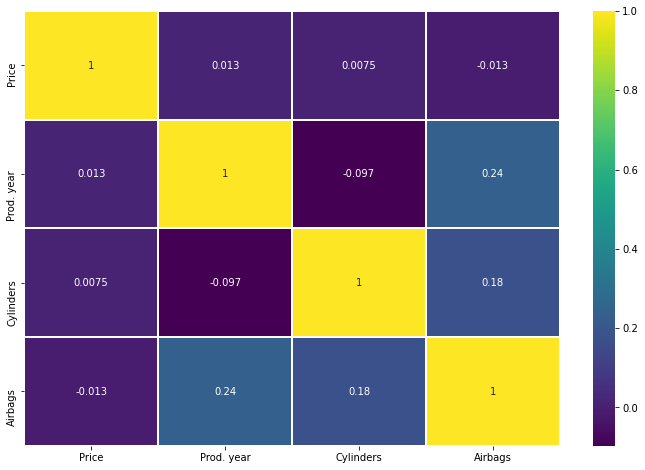

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, cmap='viridis', linecolor='white', linewidth=2)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [15]:
len(train[train['Levy'] == '-'])

5819

In [16]:
train['Levy'] = train['Levy'].apply(lambda x: float(0.0) if x == '-' else float(x))

In [17]:
train['Engine volume'] = train['Engine volume'].apply(lambda x: float(x.split()[0]))

In [18]:
train['Mileage'] = train['Mileage'].apply(lambda x: float(x.split()[0]))

In [19]:
train['car_name'] = pd.DataFrame((train['Manufacturer'] + " " + train['Model']))
train['car_name'].value_counts()

TOYOTA Prius           1083
HYUNDAI Sonata         1079
TOYOTA Camry            938
HYUNDAI Elantra         922
MERCEDES-BENZ E 350     542
                       ... 
KIA Optima SXL            1
HONDA Insight LX          1
HONDA Crosstour           1
HONDA Cr-v LX             1
FIAT 500L LONG            1
Name: car_name, Length: 1601, dtype: int64

In [20]:
train = train.drop(columns=['Manufacturer', 'Model'], axis=1)
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,car_name
0,13328,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450
1,16621,1018.0,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox
2,8467,0.0,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT
3,3607,862.0,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape
4,11726,446.0,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,HONDA FIT


In [21]:
train['car_pop'] = train['car_name'].apply(lambda x: 100*(train['car_name'].value_counts()[x])/len(train))

In [22]:
train = train.drop('car_name', axis=1)
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,car_pop
0,13328,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0.899309
1,16621,1018.0,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0.119561
2,8467,0.0,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,2.318449
3,3607,862.0,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,0.774549
4,11726,446.0,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,2.318449


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  float64
 7   Mileage           19237 non-null  float64
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  car_pop           19237 non-null  float64
dtypes: float64(5), int64(3), object(8)
memor

In [24]:
o_col = [col for col in train.columns if train[col].dtype == 'O']
len(o_col)

8

In [25]:
for col in o_col:
    train = pd.concat([train, pd.get_dummies(train[col], drop_first=True)], axis=1)

train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
0,13328,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.0,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,...,0,0,0,0,0,0,0,0,0,0
2,8467,0.0,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,...,0,0,0,0,0,0,1,0,0,0


In [26]:
train = train.drop(o_col, axis=1)
train.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,car_pop,Coupe,Goods wagon,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
0,13328,1399.0,2010,3.5,186005.0,6.0,12,0.899309,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.0,2011,3.0,192000.0,6.0,8,0.119561,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,0.0,2006,1.3,200000.0,4.0,2,2.318449,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,2.5,168966.0,4.0,0,0.774549,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,1.3,91901.0,4.0,4,2.318449,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
first_quartile = np.percentile(train['Price'], 25)
third_quartile = np.percentile(train['Price'], 75)
IQR = third_quartile - first_quartile
cutoff = 1.5*IQR
lower, upper = first_quartile - cutoff, third_quartile + cutoff
upper_outliers = train[train['Price'] > upper]
lower_outliers = train[train['Price'] < lower]
outliers = pd.concat([lower_outliers, upper_outliers])
train = train.drop(outliers.index)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [31]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1500)

In [32]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
pred = model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, explained_variance_score

In [35]:
msle = mean_squared_log_error(y_test, abs(pred))
rmsle = np.sqrt(msle)
mse = mean_squared_error(y_test, abs(pred))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, abs(pred))
evs = explained_variance_score(y_test, abs(pred))

In [36]:
msle

1.068059996382554

In [37]:
rmsle

1.0334698817007462

In [38]:
mse

35968623.42606072

In [39]:
rmse

5997.384715528988

In [40]:
r2

0.7217396623529155

In [41]:
evs

0.7217489633584835

In [42]:
train['Price'].mean()

14024.917859502313

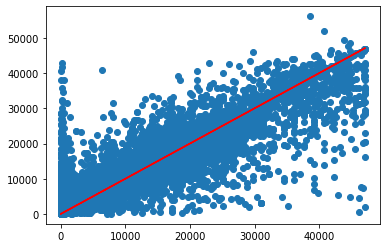

In [43]:
plt.scatter(y_test, abs(pred))
plt.plot(y_test, y_test, color='red')

In [44]:
test = pd.read_csv('test.csv')
test

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,NaN
8241,45682346,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN


In [45]:
test.drop('ID', axis=1,inplace=True)
test['Levy'] = test['Levy'].apply(lambda x: float(0.0) if x == '-' else float(x))
test['Engine volume'] = test['Engine volume'].apply(lambda x: float(x.split()[0]))
test['Mileage'] = test['Mileage'].apply(lambda x: float(x.split()[0]))
test['car_name'] = pd.DataFrame((test['Manufacturer'] + " " + test['Model']))
test = test.drop(columns=['Manufacturer', 'Model'], axis=1)
test['car_pop'] = test['car_name'].apply(lambda x: 100*(test['car_name'].value_counts()[x])/len(test))
test = test.drop('car_name', axis=1)
o_col = [col for col in test.columns if test[col].dtype == 'O']
for col in o_col:
    test = pd.concat([test, pd.get_dummies(test[col], drop_first=True)], axis=1)
test = test.drop(o_col, axis=1)

In [46]:
test = test.drop('Price', axis=1)

In [47]:
pred_test = model.predict(test)

In [48]:
pd.DataFrame(abs(pred_test), columns=['Price']).to_csv('submission.csv', index=False)